This notebook creates some plot from the results of the grid search.

In [2]:
import pandas as pd
from implicit.als import AlternatingLeastSquares

from src.algorithm.als.sparsedataset import SparseDataset
from src.algorithm.als.model_selection import GridSearchCV
from src.algorithm.als.model_wrapper import ImplicitModelWrapper

import matplotlib.pyplot as plt

plt.rcParams['figure.facecolor'] = 'white'

In [38]:
raw_df = pd.read_csv("T:/Gridsearch_new.csv")


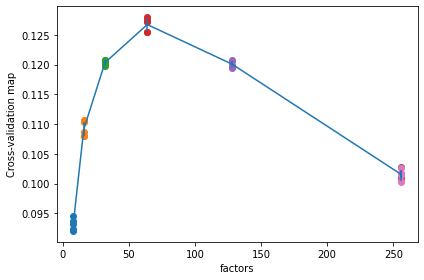

In [4]:
metric = "map"
parameter = "factors"

df = raw_df[(raw_df.regularization == 0.01) & (raw_df.iterations == 10) & (raw_df.alpha == 1)]
for i, k in enumerate(df[parameter]):
    plt.scatter([k] * 5, df[[f'Fold {i}' for i in range(5)]].iloc[i])

plt.errorbar(df[parameter], df['mean'], yerr=df['std'])

plt.xlabel(parameter)
plt.ylabel(f'Cross-validation {metric}')
plt.tight_layout()
plt.savefig(f"plots/cv_{parameter}.png", dpi=400)
plt.show()

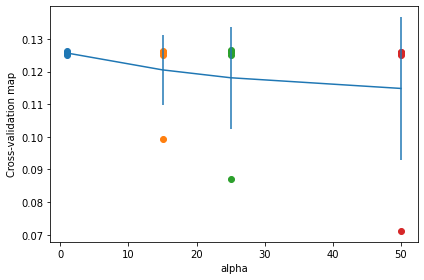

In [20]:
metric = "map"
parameter = "alpha"
# df = pd.DataFrame(grid.get_result(show=False, filter_metric=metric))
df = raw_df[(raw_df.regularization == 0.001) & (raw_df.iterations == 100) & (raw_df.factors == 64)]
for i, k in enumerate(df[parameter]):
    plt.scatter([k] * 5, df[[f'Fold {i}' for i in range(5)]].iloc[i])

plt.errorbar(df[parameter], df['mean'], yerr=df['std'])

plt.xlabel(parameter)
plt.ylabel(f'Cross-validation {metric}')
plt.tight_layout()
plt.savefig(f"plots/cv_{parameter}.png", dpi=400)
plt.show()

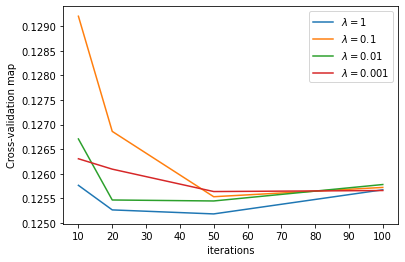

In [43]:
parameter = "iterations"
alpha = 1
fac = 64
df = raw_df[(raw_df.regularization == 1) & (raw_df.factors == fac) & (raw_df.alpha == alpha)].sort_values(by=parameter)
plt.plot(df[parameter], df['mean'], label=r"$\lambda=1$")
df = raw_df[(raw_df.regularization == 0.1) & (raw_df.factors == fac) & (raw_df.alpha == alpha)].sort_values(
    by=parameter)
plt.plot(df[parameter], df['mean'], label=r"$\lambda=0.1$")
df = raw_df[(raw_df.regularization == 0.01) & (raw_df.factors == fac) & (raw_df.alpha == alpha)].sort_values(
    by=parameter)
plt.plot(df[parameter], df['mean'], label=r"$\lambda=0.01$")
df = raw_df[(raw_df.regularization == 0.001) & (raw_df.factors == fac) & (raw_df.alpha == alpha)].sort_values(
    by=parameter)
plt.plot(df[parameter], df['mean'], label=r"$\lambda=0.001$")
plt.legend()
plt.xlabel(parameter)
plt.ylabel(f'Cross-validation {metric}')
plt.xticks(range(10, 101, 10))
plt.savefig(f"plots/cv_{parameter}_lambda.png", dpi=400)

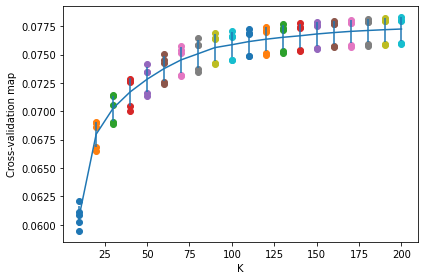

In [53]:
parameter = "K"
df_knn = pd.read_csv("nearst_neigh_grid.csv")
for i, k in enumerate(df_knn[parameter]):
    plt.scatter([k] * 5, df_knn[[f'Fold {i}' for i in range(5)]].iloc[i])

plt.errorbar(df_knn[parameter], df_knn['mean'], yerr=df_knn['std'])

plt.xlabel(parameter)
plt.ylabel(f'Cross-validation {metric}')
plt.tight_layout()
plt.savefig(f"plots/cv_{parameter}.png", dpi=400)
plt.show()